In [1]:
#importing librarires.....
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading dataset.....
#labels:-  1: Survived 2: died
df = pd.read_csv("haberman.csv")
df = df.rename(columns={"30": "Age", "64": "Year", "1":"Positive Nodes", "1.1":"label"})
df.head()

,Age,Year,Positive Nodes,label
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
df.describe()

,Age,Year,Positive Nodes,label
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observations
Large difference between 75 percentile and max value of # of positive nodes. Mean is as well significantly high.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             305 non-null    int64
 1   Year            305 non-null    int64
 2   Positive Nodes  305 non-null    int64
 3   label           305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


[]

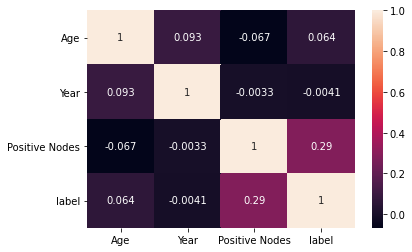

In [5]:
#correlation coefficent ranges from -1 to 1
sns.heatmap(df.corr(), annot = True)
plt.plot()

# Observation
Features are not correlated as we can see the highest correlation coefficent we can see is between # of positive nodes and label which is 0.29.

In [6]:
df['label'].replace({1:'Survived', 2:'Died'},inplace=True)
df.head()

,Age,Year,Positive Nodes,label
0,30,62,3,Survived
1,30,65,0,Survived
2,31,59,2,Survived
3,31,65,4,Survived
4,33,58,10,Survived


# Univariant Analysis

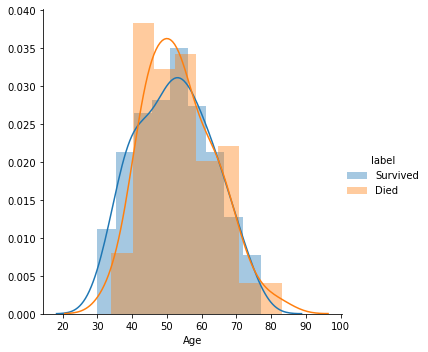

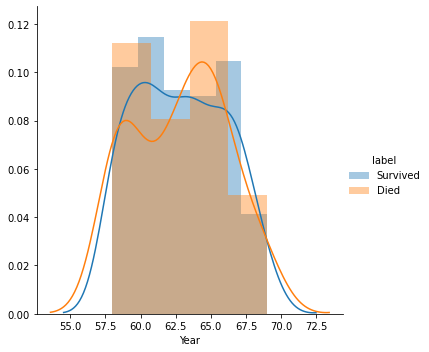

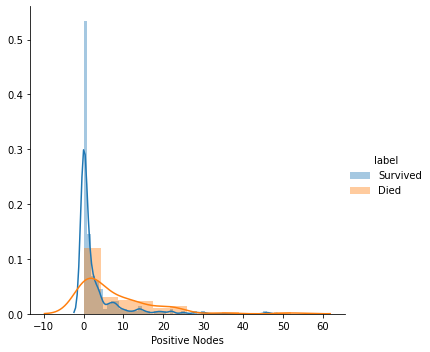

In [7]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='label', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

## Observations:
1)  As the years passed the number of deaths increased and survived population decreased.

2)  Increase in Number of positive nodes results in increase of deaths.

3)  Age also seems to play role in number of deaths as we can see in distribution for survived the average age is around 75 and     for death average age is greater than 80.

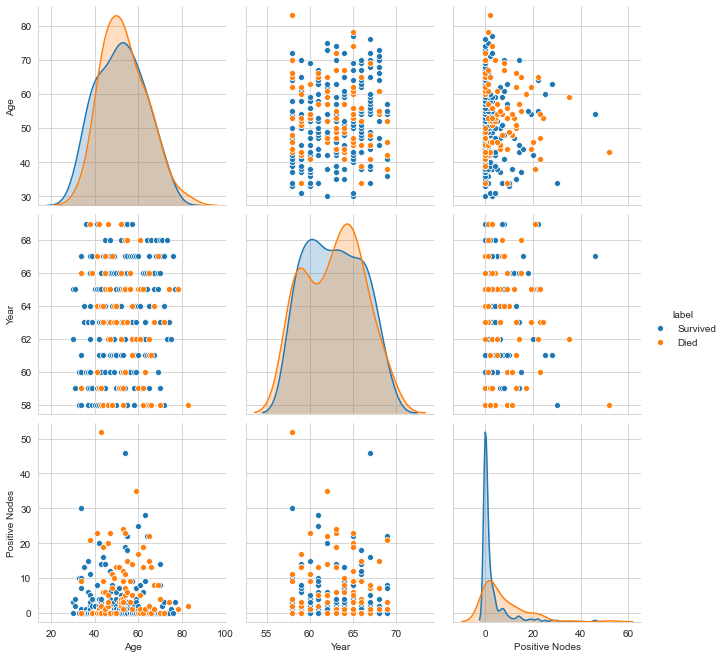

In [8]:
#pair-plot
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue = 'label', height = 3)
plt.show()

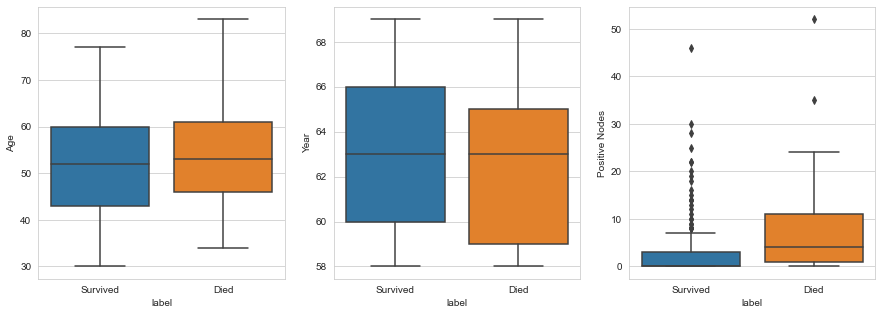

In [24]:
# Box plot of features.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='label', y=feature, data=df, ax=axes[idx])
plt.show() 

# Observations:
1. Patient with less than 5 positive nodes had better chance of surviving.
2. Patient with less age have slightly better survival rate.